In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import scipy.stats as stats

## STEP 1 :  Get the Data

In [5]:
wine = pd.read_csv(r"wine_clean_dataset_after_EDA.csv" , index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1353, 12)

## STEP 2 : Creating Binary categorical Label

In [7]:
import warnings
warnings.filterwarnings(action = "ignore")

In [8]:
# create a new column for binarized (boolean) quality
wine['Binary_cat_Quality'] = "Bad"

# Binarizing the column
wine['Binary_cat_Quality'][wine['quality']>5] = "Good"

wine[['quality','Binary_cat_Quality']]

,quality,Binary_cat_Quality
0,5,Bad
1,5,Bad
2,5,Bad
3,6,Good
4,5,Bad
...,...,...
1354,6,Good
1355,5,Bad
1356,6,Good
1357,5,Bad


In [9]:
wine['Binary_cat_Quality'].value_counts()

Good    716
Bad     637
Name: Binary_cat_Quality, dtype: int64

In [10]:
wine_trans = wine.drop(labels = ["quality"] , axis = 1).copy(True)
wine_trans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Binary_cat_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad


In [11]:
X = wine_trans.drop(labels = ["residual sugar"] ,axis = 1)
y = wine_trans["residual sugar"]

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Binary_cat_Quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.66,0.00,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad


In [13]:
y.head()

0    1.9
1    2.6
2    2.3
3    1.9
4    1.8
Name: residual sugar, dtype: float64

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder()

In [16]:
trans_arr = ohe.fit_transform(X[["Binary_cat_Quality"]]).toarray()
trans_arr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [17]:
trans_arr[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [18]:
ohe.feature_names_in_

array(['Binary_cat_Quality'], dtype=object)

In [19]:
ohe.get_feature_names_out()

array(['Binary_cat_Quality_Bad', 'Binary_cat_Quality_Good'], dtype=object)

In [20]:
X[['Quality_Bad', 'Quality_Good']] = trans_arr

In [21]:
X = X.drop(labels = ["Binary_cat_Quality"] ,axis = 1 )
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Bad,Quality_Good
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0.0
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,0.0
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,0.0
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.0,1.0
4,7.4,0.66,0.00,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1.0,0.0


In [22]:
y.head()

0    1.9
1    2.6
2    2.3
3    1.9
4    1.8
Name: residual sugar, dtype: float64

## STEP 3 :  Normalization of Data

In [23]:
# z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = X.columns


# z-score (written out for clarity)
# for col in cols2zscore:
    
#     mean_val   = np.mean(wine[col])
#     std_val    = np.std(wine[col],ddof=1)
#     wine[col]  = (wine[col]-mean_val) / std_val

# can also do more compactly
X[cols2zscore] = X[cols2zscore].apply(stats.zscore)

X.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Bad,Quality_Good
count,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03
mean,2.100644e-17,3.098449e-16,-2.100644e-17,1.470451e-16,1.050322e-17,9.452897e-17,9.742786e-14,2.100644e-15,-4.411352e-16,-2.730837e-16,-8.402575e-17,8.402575e-17
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-2.132705e+00,-2.238797e+00,-1.397346e+00,-1.668717e+00,-1.424989e+00,-1.259461e+00,-3.559786e+00,-2.945193e+00,-2.056027e+00,-1.880174e+00,-9.432204e-01,-1.060198e+00
25%,-6.957926e-01,-7.643609e-01,-9.329625e-01,-3.846707e-01,-8.492346e-01,-7.598171e-01,-5.956490e-01,-6.615761e-01,-6.666405e-01,-8.623337e-01,-9.432204e-01,-1.060198e+00
50%,-2.359807e-01,-5.444729e-02,-5.579317e-02,-1.854221e-01,-1.775208e-01,-2.601734e-01,-6.037545e-03,-9.114213e-03,-2.245629e-01,-2.146174e-01,-9.432204e-01,9.432204e-01
75%,5.112136e-01,6.008575e-01,8.213762e-01,5.810394e-02,4.941930e-01,5.205199e-01,5.942941e-01,5.781015e-01,4.701305e-01,6.181607e-01,1.060198e+00,9.432204e-01
max,4.362138e+00,5.734079e+00,2.678911e+00,8.404405e+00,5.388108e+00,3.705749e+00,3.740675e+00,4.558119e+00,6.090831e+00,4.134335e+00,1.060198e+00,9.432204e-01


In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Bad,Quality_Good
0,-0.523363,0.928510,-1.397346,-0.251838,-0.465398,-0.385084,0.583574,1.295810,-0.603487,-0.954865,1.060198,-1.060198
1,-0.293457,1.911467,-1.397346,0.235214,0.878029,0.645431,0.047563,-0.726822,0.154361,-0.584741,1.060198,-1.060198
2,-0.293457,1.256162,-1.190954,0.102381,-0.081562,0.239470,0.154766,-0.335345,-0.035101,-0.584741,1.060198,-1.060198
3,1.660743,-1.365057,1.492153,-0.273977,0.110357,0.426837,0.690776,-0.987807,-0.477179,-0.584741,-0.943220,0.943220
4,-0.523363,0.710075,-1.397346,-0.273977,-0.273480,-0.197718,0.583574,1.295810,-0.603487,-0.954865,1.060198,-1.060198


## STEP 4 : Converting Data to tensor 

In [25]:
# pred_col = X.columns.drop(labels = ['quality', 'boolQuality'])
# pred_col

In [26]:
X_arr = X.values

In [27]:
X_arr

array([[-0.5233631 ,  0.92850995, -1.39734632, ..., -0.95486462,
         1.06019755, -1.06019755],
       [-0.29345717,  1.91146719, -1.39734632, ..., -0.58474102,
         1.06019755, -1.06019755],
       [-0.29345717,  1.25616236, -1.19095353, ..., -0.58474102,
         1.06019755, -1.06019755],
       ...,
       [-1.38551036,  0.10937892, -0.88136434, ...,  0.71069156,
        -0.94322044,  0.94322044],
       [-1.38551036,  0.6281619 , -0.77816795, ..., -0.21461743,
         1.06019755, -1.06019755],
       [-1.32803388, -1.20123074,  1.02776898, ...,  0.52562976,
        -0.94322044,  0.94322044]])

#### Predictiors or Independent features

In [28]:
X_tensor = torch.tensor(X_arr ,dtype = torch.float )
X_tensor[:5]

tensor([[-0.5234,  0.9285, -1.3973, -0.2518, -0.4654, -0.3851,  0.5836,  1.2958,
         -0.6035, -0.9549,  1.0602, -1.0602],
        [-0.2935,  1.9115, -1.3973,  0.2352,  0.8780,  0.6454,  0.0476, -0.7268,
          0.1544, -0.5847,  1.0602, -1.0602],
        [-0.2935,  1.2562, -1.1910,  0.1024, -0.0816,  0.2395,  0.1548, -0.3353,
         -0.0351, -0.5847,  1.0602, -1.0602],
        [ 1.6607, -1.3651,  1.4922, -0.2740,  0.1104,  0.4268,  0.6908, -0.9878,
         -0.4772, -0.5847, -0.9432,  0.9432],
        [-0.5234,  0.7101, -1.3973, -0.2740, -0.2735, -0.1977,  0.5836,  1.2958,
         -0.6035, -0.9549,  1.0602, -1.0602]])

In [29]:
type(X_tensor)

torch.Tensor

#### Labels

In [30]:
y_arr = y.values

In [31]:
y_arr

array([1.9, 2.6, 2.3, ..., 2.2, 2. , 3.6])

In [32]:
y_tensor = torch.tensor(y_arr ,dtype = torch.float)

In [33]:
y_tensor

tensor([1.9000, 2.6000, 2.3000,  ..., 2.2000, 2.0000, 3.6000])

In [34]:
y_tensor[:,None]

tensor([[1.9000],
        [2.6000],
        [2.3000],
        ...,
        [2.2000],
        [2.0000],
        [3.6000]])

In [35]:
y_tensor = y_tensor[:,None]

## STEP 5 :  Convert the Data into Tensor Dataset

In [36]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [37]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(X_tensor, y_tensor, test_size=.2)


# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects

batchsize    = 32 
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True  ,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0] ) 

In [38]:
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 12]) torch.Size([32, 1])
torch.Size([32, 

In [39]:
for X,y in test_loader:
    print(X.shape,y.shape)

torch.Size([271, 12]) torch.Size([271, 1])


## STEP 6 : Custom Class for ANN model

In [40]:
# create a class for the model

class ANNwine_Reg(nn.Module):
    
    #def __init__(self ,act_func):
    
    def __init__(self ):
        
        super().__init__()

        ### input layer
        self.input = nn.Linear(12,16)
        
        # 16 : number of input features to self.fc1
        self.bnorm1 = nn.BatchNorm1d(16)
        ### hidden layers(fc : Fully Connected)
        self.fc1 = nn.Linear(16,32) 
         
        
        # 32 : number of input features to self.fc2
        self.bnorm2 = nn.BatchNorm1d(32) 
        self.fc2 = nn.Linear(32,32)
        

        ### output layer
        self.output = nn.Linear(32,1)
        
        # Activation Function
        #self.act_func = act_func

    # forward pass
    def forward(self,x,DoBN):
        
        #actfunc = getattr(torch , self.act_func)
        
        x = F.relu( self.input(x) )
        
        if DoBN :
            
            # Hidden -Layer :1 
            x = self.bnorm1(x)
            x = F.relu( self.fc1(x) )
            
            # Hidden -Layer : 2 
            x = self.bnorm2(x)
            x = F.relu( self.fc2(x) )
            
        else :
            
            # Hidden Layer -1 
            x = F.relu( self.fc1(x) )
            
            # Hidden Layer -2
            x = F.relu( self.fc2(x) )
            
                
        return self.output(x)

In [41]:
# test the model
# use sigmoid, relu, tanh

net = ANNwine_Reg()
net( x = torch.randn(10,12) ,DoBN = True  ).shape

torch.Size([10, 1])

## STEP 7 : Custom Train Model Function

In [42]:
from sklearn.metrics import mean_squared_error  as mse 

In [43]:
from sklearn.metrics import r2_score  as r2

In [44]:
# a function that trains the model

def trainTheModel(Model, train_loader , test_loader ,LR ,epochs ,DoBN):

    # loss function and optimizer
    lossfunc = nn.MSELoss()  # Regression
    optimizer = torch.optim.SGD(Model.parameters(),lr=LR)

    # initialize losses
    losses   = torch.zeros(epochs)
    
    trainRMSE = []
    trainR2_Score = []
    
    testRMSE  = []
    testR2_Score = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchRMSE  = []
        batchR2_Score = []
        batchLoss = []
    
        for X,y in train_loader:

            # forward pass and loss
            yHat_train = Model(X ,DoBN )  
            #print("Y predicted : " , yHat_train.shape)
            #print("Y Actual : " ,y.shape)
            
            loss = lossfunc(yHat_train,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute training accuracy for this batch
            #batchAcc.append( 100*torch.mean( ( (yHat_train>0) == y ).float() ).item() )
            
            rmse_batchtrain = np.round(np.sqrt(mse(y,yHat_train.detach())) ,2)
            batchRMSE.append( rmse_batchtrain )
            
            r2_batchtrain = np.round(  r2( y,yHat_train.detach())  ,2 )
            
            # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        #trainAcc.append( np.mean(batchAcc) )
        trainRMSE.append( np.round(np.mean(batchRMSE),2 ))
        trainR2_Score.append(np.round(np.mean(r2_batchtrain),2 ))

        # and get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)
    
        # ****** TESTING *******
        Model.eval()
        
        # extract X,y from test dataloader
        X,y = next(iter(test_loader)) 
        
        with torch.no_grad(): # deactivates autograd
            yHat_test = Model(X ,DoBN)
            
        # test accuracy    
        # testAcc.append( 100*torch.mean( ( (yHat_test>0) == y ).float() ).item() )
        rmse_test = np.round(np.sqrt(mse(y,yHat_test.detach())) ,2)
        
        testRMSE.append(rmse_test) 
        
        r2_batchtest = np.round( r2(y,yHat_test.detach())  ,2 )
        testR2_Score.append(r2_batchtest)
        
  
    # function output for each iteration(epoch)
    return trainRMSE,trainR2_Score, testRMSE, testR2_Score , losses

## STEP 8 : Parametric Experiment

In [45]:
# This cell takes 3 mins
numepochs = 2000
LR = 0.01

# create and train a model without Batch-Normalization
ANN_wine_Regmodel = ANNwine_Reg()

# trainAcc_NO_batchNorm,testAcc_NO_batchNorm,losses_NO_batchNorm = trainTheModel(Model = ANN_wine_model,
#                                                                  train_loader = train_loader ,
#                                                                  test_loader = test_loader,
#                                                                  LR = LR,
#                                                                  epochs = numepochs,
#                                                                  DoBN  = False)

# create and train a model with Batch-Normalization
trainRMSE_batchNorm,trainR2_Score , testRMSE_batchNorm,testR2_Score , losses_batchNorm = trainTheModel(Model = ANN_wine_Regmodel,
                                                                                         train_loader = train_loader ,
                                                                                         test_loader = test_loader,
                                                                                         LR = LR,
                                                                                         epochs = numepochs,
                                                                                         DoBN  = True)


## STEP 9 : Results Visualization

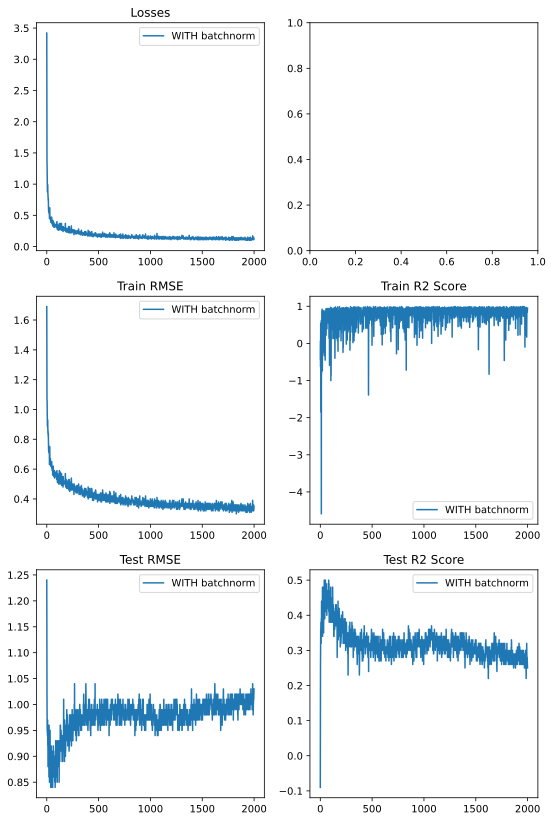

In [46]:
# plot the results
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(9,14) ,dpi = 135)
    
### Losses
ax[0,0].plot(losses_batchNorm,label='WITH batchnorm')
#ax[0].plot(losses_NO_batchNorm,label='NO batchnorm')
ax[0,0].set_title('Losses')
ax[0,0].legend()


### Train : RMSE and R2 score
ax[1,0].plot(trainRMSE_batchNorm,label='WITH batchnorm')
#ax[1].plot(trainAcc_NO_batchNorm,label='NO batchnorm')
ax[1,0].set_title('Train RMSE')
ax[1,0].legend()


ax[1,1].plot(trainR2_Score,label='WITH batchnorm')
#ax[1].plot(trainAcc_NO_batchNorm,label='NO batchnorm')
ax[1,1].set_title('Train R2 Score')
ax[1,1].legend()


### Test : RMSE and R2 score
ax[2,0].plot(testRMSE_batchNorm,label='WITH batchnorm')
#ax[2].plot(testAcc_NO_batchNorm,label='NO batchnorm')
ax[2,0].set_title('Test RMSE')
ax[2,0].legend()

ax[2,1].plot(testR2_Score,label='WITH batchnorm')
#ax[2].plot(testAcc_NO_batchNorm,label='NO batchnorm')
ax[2,1].set_title('Test R2 Score')
ax[2,1].legend()


plt.show()

In [47]:
#sklearn.metrics.r2_score 